In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
profit_df = pd.read_csv("farm_profit_dashboard_dataset.csv")
yield_df = pd.read_csv("crop_yield.csv")

In [3]:
profit_df.head()

,Crop,Total_Cost_INR,Profit,Temperature_C,Rainfall_mm,Area_Hectare
0,Wheat,153401.52,308178.48,16.69,587.55,5.77
1,Wheat,300325.26,625144.74,25.08,781.27,11.92
2,Cotton,74235.93,318464.07,16.68,828.31,2.64
3,Rice,293267.31,562092.69,16.67,385.05,9.95
4,Wheat,56864.20,96435.80,29.76,1134.28,1.92


In [4]:
yield_df.head()

,Crop,Temperature,Rainfall,Yield
0,Maize,22.97,1305.68,11.42
1,Potato,17.00,1942.05,23.19
2,Rice,25.52,2216.20,7.94
3,Sugarcane,18.59,607.18,72.53
4,Wheat,22.74,483.47,6.72


In [5]:
profit_df.tail()

,Crop,Total_Cost_INR,Profit,Temperature_C,Rainfall_mm,Area_Hectare
3544,Maize,98491.17,226768.83,23.76,1979.97,3.26
3545,Potato,186471.73,1453208.27,39.09,1767.20,7.08
3546,Maize,36227.00,89053.00,24.44,748.47,1.29
3547,Potato,193501.36,1213018.64,39.48,1915.20,6.02
3548,Rice,267690.54,1109509.46,37.71,1392.02,11.69


In [6]:
yield_df.tail()

,Crop,Temperature,Rainfall,Yield
3494,Maize,32.77,911.86,10.61
3495,Potato,19.86,846.99,23.26
3496,Cotton,17.60,2529.03,8.08
3497,Cotton,35.14,2592.02,7.90
3498,Sugarcane,38.82,1100.34,73.67


In [7]:
profit_df.shape

(3549, 6)

In [8]:
yield_df.shape

(3499, 4)

In [9]:
profit_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Total_Cost_INR,3549.0,173264.079076,95504.344185,11001.51,92233.37,171509.92,249394.42,442285.41
Profit,3549.0,770449.265528,645277.951563,21082.52,297338.05,560764.43,1047912.27,2683782.63
Temperature_C,3549.0,26.095717,8.087256,12.00,19.06,26.20,33.11,39.99
Rainfall_mm,3549.0,1387.065075,637.196471,300.36,835.80,1389.59,1939.59,2499.78
Area_Hectare,3549.0,6.298149,3.313710,0.50,3.44,6.31,9.22,11.99


In [10]:
yield_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,3499.0,25.100566,8.708240,10.0,17.705,24.8,32.77,40.00
Rainfall,3499.0,1545.130506,715.738253,300.7,940.535,1539.3,2150.96,2799.26
Yield,3499.0,22.402626,24.132203,3.3,8.280,10.2,24.76,79.99


In [11]:
profit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3549 entries, 0 to 3548
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Crop            3549 non-null   object 
 1   Total_Cost_INR  3549 non-null   float64
 2   Profit          3549 non-null   float64
 3   Temperature_C   3549 non-null   float64
 4   Rainfall_mm     3549 non-null   float64
 5   Area_Hectare    3549 non-null   float64
dtypes: float64(5), object(1)
memory usage: 166.5+ KB


In [12]:
yield_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3499 entries, 0 to 3498
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Crop         3499 non-null   object 
 1   Temperature  3499 non-null   float64
 2   Rainfall     3499 non-null   float64
 3   Yield        3499 non-null   float64
dtypes: float64(3), object(1)
memory usage: 109.5+ KB


In [13]:
profit_df.isnull().sum(), yield_df.isnull().sum()

(Crop              0
 Total_Cost_INR    0
 Profit            0
 Temperature_C     0
 Rainfall_mm       0
 Area_Hectare      0
 dtype: int64,
 Crop           0
 Temperature    0
 Rainfall       0
 Yield          0
 dtype: int64)

In [14]:
yield_df.isnull().sum(), yield_df.isnull().sum()

(Crop           0
 Temperature    0
 Rainfall       0
 Yield          0
 dtype: int64,
 Crop           0
 Temperature    0
 Rainfall       0
 Yield          0
 dtype: int64)

In [15]:
profit_df.dtypes

Crop               object
Total_Cost_INR    float64
Profit            float64
Temperature_C     float64
Rainfall_mm       float64
Area_Hectare      float64
dtype: object

In [16]:
yield_df.dtypes

Crop            object
Temperature    float64
Rainfall       float64
Yield          float64
dtype: object

In [17]:
numeric_cols = ["Total_Cost_INR", "Profit", "Temperature_C", "Rainfall_mm", "Area_Hectare"]
for col in numeric_cols:
    profit_df[col] = pd.to_numeric(profit_df[col], errors="coerce")

yield_df["Yield"] = pd.to_numeric(yield_df["Yield"], errors="coerce")

In [18]:
merged_df = pd.merge(profit_df, yield_df, on="Crop", how="inner")
merged_df.head()

,Crop,Total_Cost_INR,Profit,Temperature_C,Rainfall_mm,Area_Hectare,Temperature,Rainfall,Yield
0,Wheat,153401.52,308178.48,16.69,587.55,5.77,22.74,483.47,6.72
1,Wheat,153401.52,308178.48,16.69,587.55,5.77,29.95,998.65,6.89
2,Wheat,153401.52,308178.48,16.69,587.55,5.77,18.23,1550.47,8.19
3,Wheat,153401.52,308178.48,16.69,587.55,5.77,36.95,468.30,5.64
4,Wheat,153401.52,308178.48,16.69,587.55,5.77,11.67,962.35,8.99


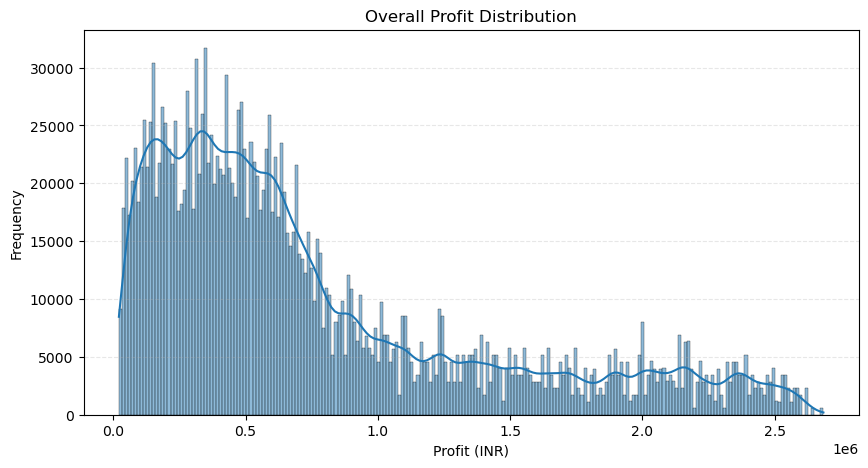

In [19]:
plt.figure(figsize=(10,5))
sns.histplot(merged_df["Profit"], kde=True)
plt.title("Overall Profit Distribution")
plt.xlabel("Profit (INR)")
plt.ylabel("Frequency")
plt.grid(True, axis='y', linestyle='--', alpha=0.3)
plt.show()

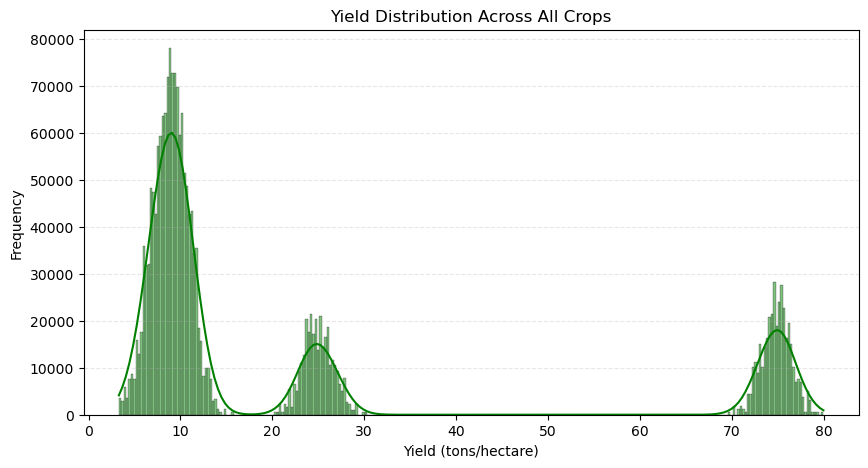

In [20]:
plt.figure(figsize=(10,5))
sns.histplot(merged_df["Yield"], kde=True, color='green')
plt.title("Yield Distribution Across All Crops")
plt.xlabel("Yield (tons/hectare)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

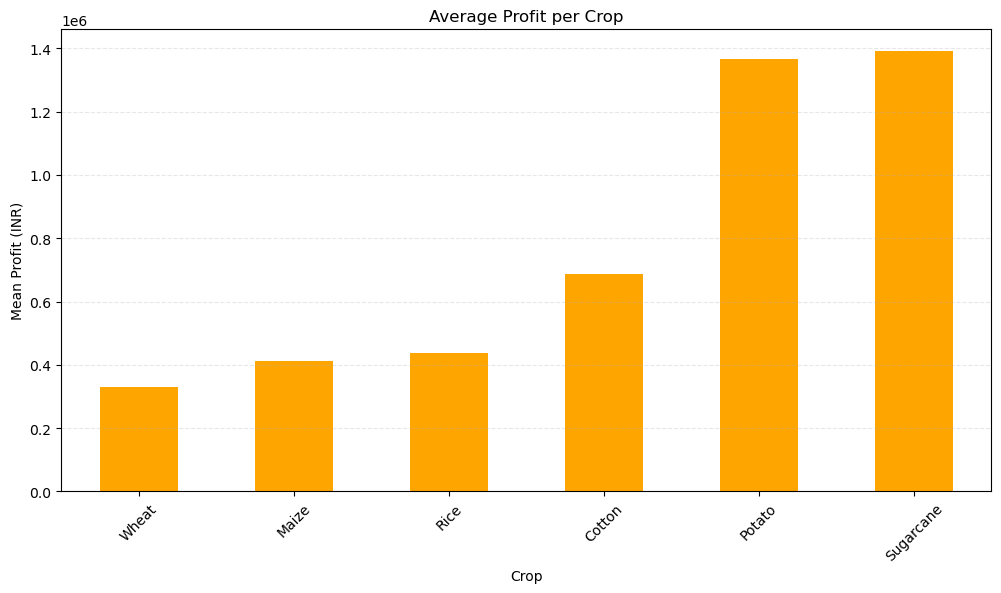

In [21]:
plt.figure(figsize=(12,6))
merged_df.groupby("Crop")["Profit"].mean().sort_values().plot(
    kind="bar", color='orange'
)
plt.title("Average Profit per Crop")
plt.ylabel("Mean Profit (INR)")
plt.xlabel("Crop")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

/opt/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


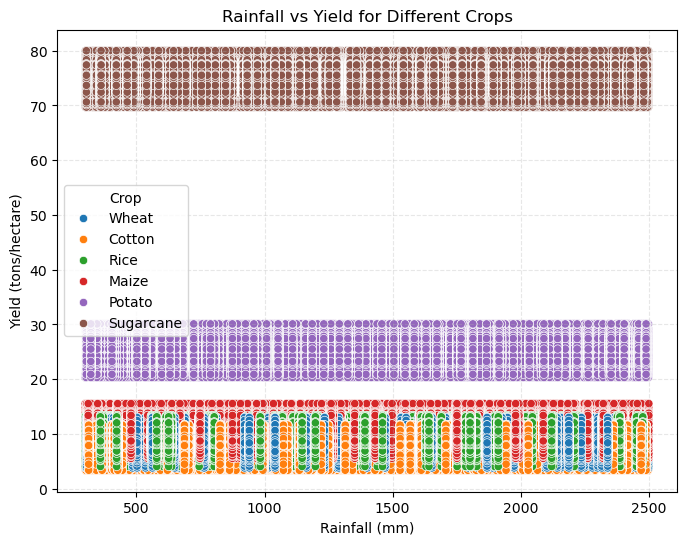

In [22]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=merged_df, x="Rainfall_mm", y="Yield", hue="Crop")
plt.title("Rainfall vs Yield for Different Crops")
plt.xlabel("Rainfall (mm)")
plt.ylabel("Yield (tons/hectare)")
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

/opt/anaconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


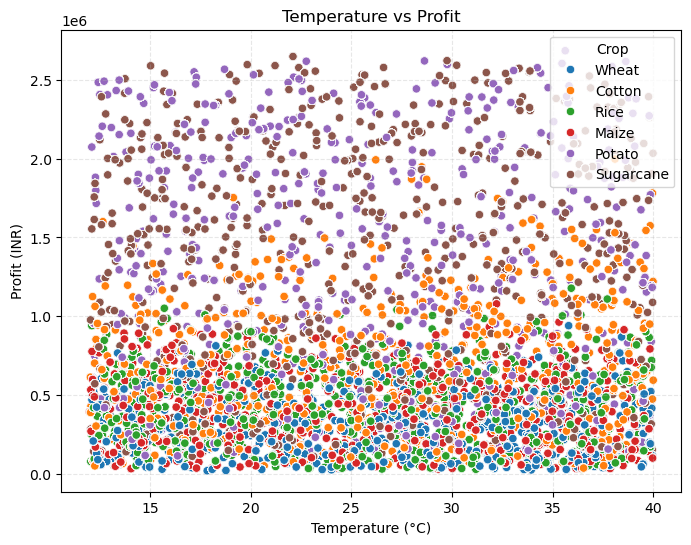

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=merged_df, x="Temperature_C", y="Profit", hue="Crop")
plt.title("Temperature vs Profit")
plt.xlabel("Temperature (°C)")
plt.ylabel("Profit (INR)")
plt.grid(True, linestyle='--', alpha=0.3)
plt.show()

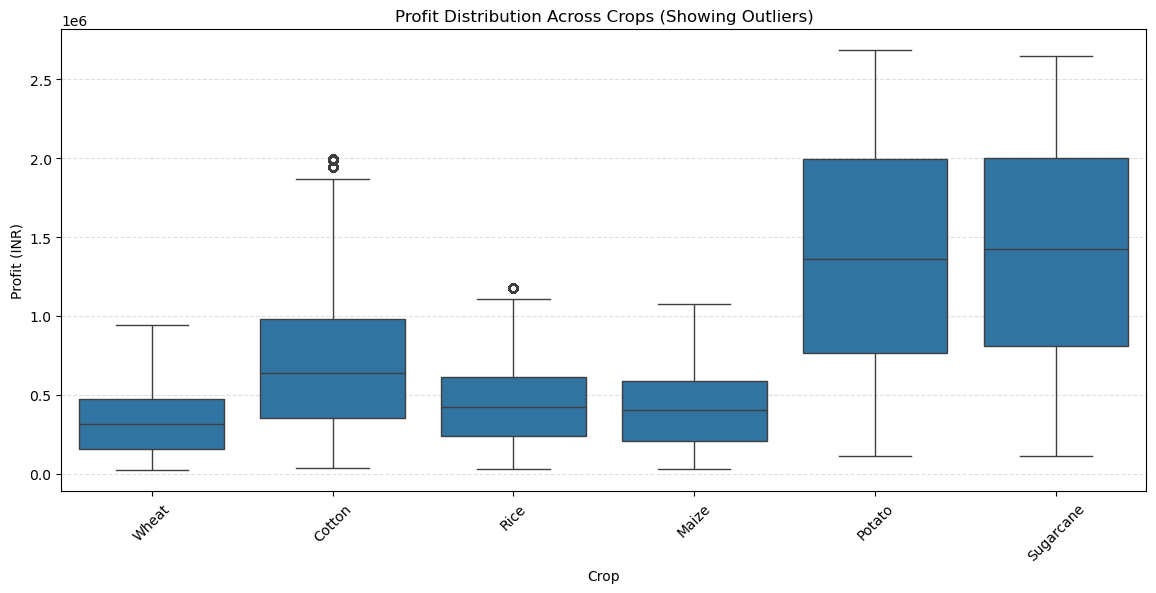

In [24]:
plt.figure(figsize=(14,6))
sns.boxplot(data=merged_df, x="Crop", y="Profit")
plt.title("Profit Distribution Across Crops (Showing Outliers)")
plt.xlabel("Crop")
plt.ylabel("Profit (INR)")
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.4)
plt.show()

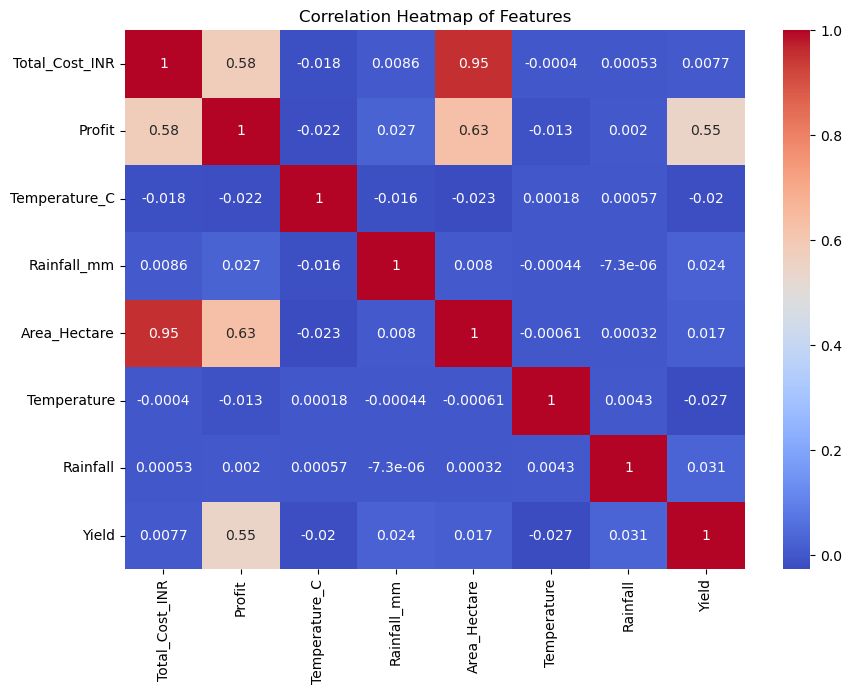

In [25]:
plt.figure(figsize=(10,7))
sns.heatmap(merged_df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Features")
plt.show()

In [26]:
def normalize(col):
    return (col - col.min()) / (col.max() - col.min())

merged_df["Yield_Score"] = normalize(merged_df["Yield"])
merged_df["Profit_Score"] = normalize(merged_df["Profit"])

In [27]:
X = merged_df[[
    "Temperature_C",
    "Rainfall_mm",
    "Yield",
    "Total_Cost_INR",
    "Area_Hectare"
]]

y = merged_df["Profit"]

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
X_train

,Temperature_C,Rainfall_mm,Yield,Total_Cost_INR,Area_Hectare
1232035,15.65,2005.11,11.08,60340.51,2.53
1415144,27.12,1850.77,10.39,296811.62,10.15
1526816,30.34,657.81,10.81,159673.81,6.53
1306645,31.94,1238.26,73.66,136951.60,4.16
794837,31.93,1156.52,73.55,20163.41,0.81
...,...,...,...,...,...
259178,24.51,1267.36,3.84,194616.96,7.68
1414414,29.96,2032.71,6.62,46073.41,1.89
131932,27.45,2321.51,12.92,20713.50,0.75
671155,17.59,1158.67,7.52,246554.00,8.31


In [30]:
y_train

1232035    175719.49
1415144    689008.38
1526816    583376.19
1306645    891593.40
794837     177551.59
             ...    
259178     914733.04
1414414    244876.59
131932      56866.50
671155     494846.00
121958     818597.56
Name: Profit, Length: 1656017, dtype: float64

In [31]:
X_test

,Temperature_C,Rainfall_mm,Yield,Total_Cost_INR,Area_Hectare
2044112,21.81,1750.80,13.19,157467.96,5.61
1567914,29.13,358.15,27.89,149745.76,6.51
1826398,32.71,401.61,9.92,28243.12,1.05
391796,20.30,1508.72,12.68,124487.35,5.29
486546,20.12,763.38,22.91,341174.64,11.34
...,...,...,...,...,...
2045907,35.80,969.18,10.14,182869.47,5.33
1132577,34.74,2343.75,8.60,188980.63,7.60
353794,25.90,1874.73,7.24,261356.88,11.85
1825240,36.80,681.47,9.95,77955.70,3.61


In [32]:
y_test

2044112     398732.04
1567914    1468574.24
1826398      42106.88
391796      460492.65
486546     2262465.36
              ...    
2045907     334810.53
1132577     335599.37
353794      736983.12
1825240     265244.30
1305089     338117.96
Name: Profit, Length: 414005, dtype: float64

In [33]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(
    n_estimators=50,
    random_state=42
)

rf_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=50, random_state=42)

In [34]:
from sklearn.metrics import r2_score, mean_absolute_error

y_pred = rf_reg.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

R2 Score: 0.9999970455442232
MAE: 21.65408296914977


In [35]:
def profit_label(p):
    if p < 200000:
        return "Low"
    elif p < 500000:
        return "Medium"
    else:
        return "High"

merged_df["Profit_Class"] = merged_df["Profit"].apply(profit_label)

In [36]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_class = encoder.fit_transform(merged_df["Profit_Class"])

In [37]:
from sklearn.ensemble import RandomForestClassifier

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X, y_class, test_size=0.2, random_state=42
)

rf_clf = RandomForestClassifier(n_estimators=50, random_state=42)
rf_clf.fit(X_train_c, y_train_c)

RandomForestClassifier(n_estimators=50, random_state=42)

In [38]:
from sklearn.metrics import accuracy_score

y_pred_c = rf_clf.predict(X_test_c)
print("Accuracy:", accuracy_score(y_test_c, y_pred_c))

Accuracy: 1.0


In [39]:
risk_df = merged_df.groupby("Crop")["Profit"].std().reset_index()
risk_df.columns = ["Crop", "Profit_SD"]

merged_df = merged_df.merge(risk_df, on="Crop", how="left")

In [40]:
def risk_level(sd):
    if sd < 150000:
        return "Low"
    elif sd < 400000:
        return "Medium"
    else:
        return "High"

merged_df["Risk_Level"] = merged_df["Profit_SD"].apply(risk_level)

In [41]:
merged_df["Predicted_Profit"] = rf_reg.predict(X)

merged_df["Suitability_Score"] = (
    normalize(merged_df["Predicted_Profit"]) * 0.4 +
    merged_df["Yield_Score"] * 0.3 +
    merged_df["Profit_Score"] * 0.3
)

In [45]:
merged_df.sort_values("Suitability_Score", ascending=False).head(1)

,Crop,Total_Cost_INR,Profit,Temperature_C,Rainfall_mm,Area_Hectare,Temperature,Rainfall,Yield,Yield_Score,Profit_Score,Profit_Class,Profit_SD,Risk_Level,Predicted_Profit,Suitability_Score
694051,Sugarcane,278690.76,2647309.24,22.1,611.75,11.96,21.55,2613.64,79.99,1.0,0.986302,High,700087.745444,High,2647309.24,0.990411


In [46]:
import joblib

joblib.dump(rf_reg, "profit_model.pkl")
joblib.dump(rf_clf, "profit_classifier.pkl")
joblib.dump(encoder, "label_encoder.pkl")

merged_df.to_csv("merged_data.csv", index=False)